In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np


In [2]:
def gen_data(x):
    x0, x1, x2 = np.meshgrid(x, x, x)
    x0 = x0.ravel()
    x1 = x1.ravel()
    x2 = x2.ravel()
    z = np.sin(5 * x0) + .4 * np.sin(x1) + .2 * np.sin(x2)
    return x0, x1, x2, z

In [3]:
x = np.linspace(0, 1, 10)
x0, x1, x2, z = gen_data(x)

In [4]:
# validation set
x_val = np.linspace(0, 1, 20)
x0_val, x1_val, x2_val, z_val = gen_data(x_val)

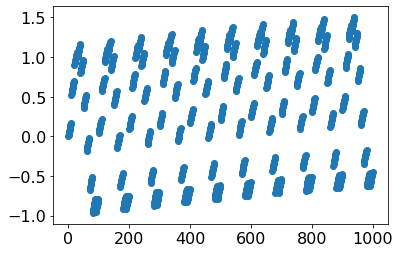

In [5]:
plt.figure()
plt.scatter(range(len(z)), z)

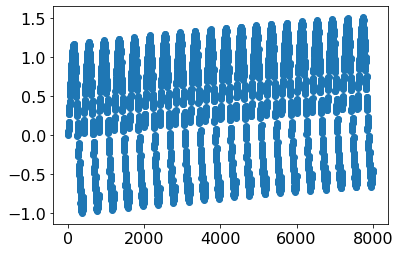

In [20]:
plt.figure()
plt.scatter(range(len(z_val)), z_val)

In [21]:
from scipy.interpolate import Rbf

In [22]:
rbfi = Rbf(x0, x1, x2, z)

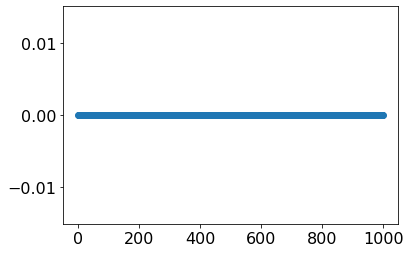

In [23]:
plt.figure()
plt.scatter(range(len(z)), rbfi(x0, x1, x2) - z)

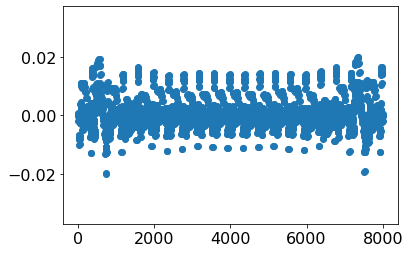

In [24]:
plt.figure()
plt.scatter(range(len(z_val)), rbfi(x0_val, x1_val, x2_val) - z_val)

In [25]:
%%timeit
rbfi(x0_val, x1_val, x2_val)

59 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%%timeit
rbfi(0,0,1)

37.4 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# try SVR

In [6]:
from sklearn.svm import SVR

In [ ]:
rbfi = Rbf(x0, x1, x2, z)

In [8]:
z.shape

(1000,)

In [9]:
x0.shape

(1000,)

In [14]:
X = np.array([x0, x1, x2]).T

In [38]:
clf = SVR(kernel='rbf', C=1, epsilon=0.005, gamma=100)
clf.fit(X, z)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.005, gamma=100,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

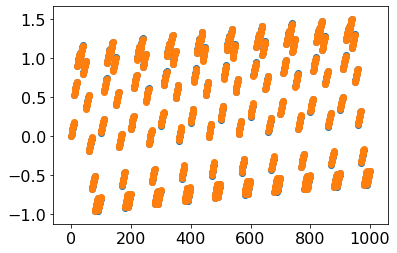

In [39]:
plt.figure()
plt.scatter(range(len(z)), z)
plt.scatter(range(len(z)), clf.predict(X))

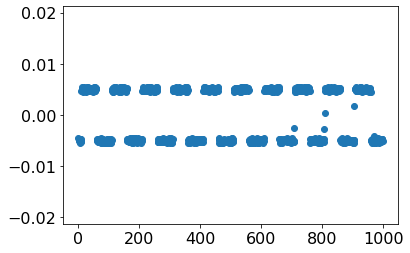

In [40]:
plt.figure()
plt.scatter(range(len(z)), z - clf.predict(X))

In [41]:
X_val = np.array([x0_val, x1_val, x2_val]).T

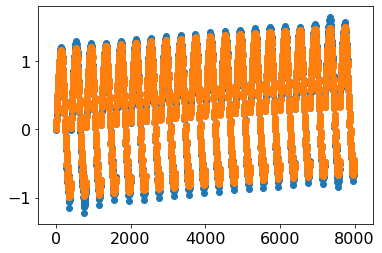

In [42]:
plt.figure()
plt.scatter(range(len(z_val)), clf.predict(X_val))
plt.scatter(range(len(z_val)), z_val)

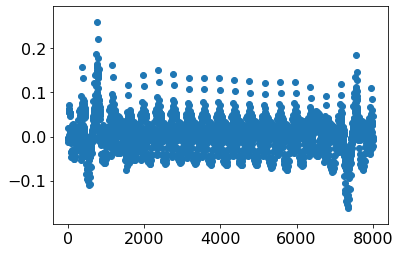

In [43]:
plt.figure()
plt.scatter(range(len(z_val)), z_val - clf.predict(X_val))

In [44]:
%%timeit
clf.predict(X_val)

96.4 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
